<a href="https://colab.research.google.com/github/dayoung-lab/RL-Final-Project-A65037-/blob/main/%20MountainCar-v0(continuous%20solution)%20/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://sungbeomchoi.github.io/book_review/2021-03-12-ch10_Reinforcement_Learning

In [1]:
import gym

In [2]:
env = gym.make('MountainCarContinuous-v0')

print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high, '\\n')
print(env.action_space, '\\n')
print(env._max_episode_steps)

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
[-1.2  -0.07]
[0.6  0.07] \n
Box(-1.0, 1.0, (1,), float32) \n
999


/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
env.reset()
score = 0
step = 0
for i in range(200):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)

  previous_obs = obs
  score += reward
  step += 1

  if done:
    break

print(score, step)

-6.187742916538648 200


random action

In [4]:
env.reset()
score = 0
step = 0

while True:
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)

  previous_obs = obs
  score += reward
  step += 1
  if done:
    break

print(score, step)

-31.47677269515495 999


In [5]:
import numpy as np

모델 학습

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
-199.82893333333334
[-188, -170, -162, -156, -178, -188, -186, -170, -192, -196, -186, -190, -196, -184, -182, -182, -184, -178, -192, -194, -168, -184, -182, -172, -188, -176, -164, -180, -196, -156, -170, -188,

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


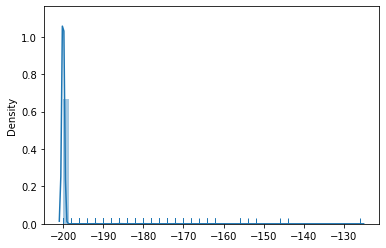

In [8]:
scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(15000):
  if i % 100 == 0:
    print(i)
  env.reset()
  score = 0
  game_memory = []
  previous_obs = []
  
  for i in range(200):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    if len(previous_obs) > 0:
      game_memory.append([previous_obs, action])

    previous_obs = obs
    if obs[0] > -0.2:
      reward = 1
    else:
      reward = -1

    score += reward

    if done:
      break

  scores.append(score)
  if score > required_score:
    accepted_scores.append(score)
    for data in game_memory:
      training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug=True)

In [9]:
import tensorflow as tf  
import gym  
import random  
import numpy as np
import keras

In [10]:
model = tf.keras.Sequential([
              tf.keras.layers.Dense(128, input_shape=(2,), activation='elu'),
              tf.keras.layers.Dense(32, activation='elu'),
              tf.keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

In [11]:
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)

In [12]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
574/574 [==============================] - 3s 3ms/step - loss: 0.3368 - val_loss: 0.3369
Epoch 2/10
574/574 [==============================] - 1s 3ms/step - loss: 0.3336 - val_loss: 0.3351
Epoch 3/10
574/574 [==============================] - 1s 2ms/step - loss: 0.3330 - val_loss: 0.3339
Epoch 4/10
574/574 [==============================] - 1s 2ms/step - loss: 0.3335 - val_loss: 0.3355
Epoch 5/10
574/574 [==============================] - 1s 3ms/step - loss: 0.3328 - val_loss: 0.3351
Epoch 6/10
574/574 [==============================] - 1s 2ms/step - loss: 0.3331 - val_loss: 0.3340
Epoch 7/10
574/574 [==============================] - 1s 2ms/step - loss: 0.3325 - val_loss: 0.3339
Epoch 8/10
574/574 [==============================] - 1s 3ms/step - loss: 0.3325 - val_loss: 0.3349
Epoch 9/10
574/574 [==============================] - 1s 2ms/step - loss: 0.3326 - val_loss: 0.3338
Epoch 10/10
574/574 [==============================] - 1s 2ms/step - loss: 0.3325 - val_loss: 0.3337

In [16]:
scores = []
steps = []
actions = []

for i in range(500):
  if i % 100 == 99:
    print(i, 'mean score: {}, mean step: {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:])))

    score = 0
    step = 0
    previous_obs = []
    env.reset()

    while True:
      if len(previous_obs) == 0:
        action = env.action_space.sample()
      else:
        action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
        actions.append(action)

      obs, reward, done, info = env.step(action)
      previous_obs = obs
      score += reward
      step += 1

      if done:
        break

    scores.append(score)
    steps.append(step)

99 mean score: nan, mean step: nan
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1/1 [==============================] - 0s 19ms/step
199 mean score: 99.00351949880627, mean step: 751.0
1/1 [==============================] - 0s 18ms/step
299 mean score: 99.12455361403731, mean step: 704.5
1/1 [==============================] - 0s 24ms/step
399 mean score: 99.11864672052047, mean step: 676.3333333333334
1/1 [==============================] - 0s 18ms/step
499 mean score: 99.15771512991132, mean step: 626.0
1/1 [==============================] - 0s 26ms/step


평균 스코어는 39

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

99.13409814664588


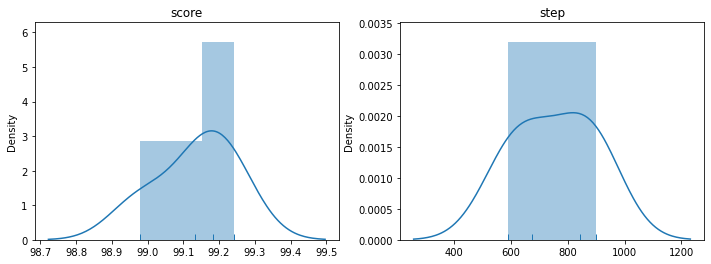

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


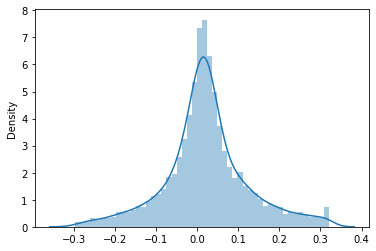

In [15]:
sns.distplot(actions)
